In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import regularizers

In [26]:
df = pd.read_csv("case_time_series.csv")

In [27]:
df['Date'] = pd.to_datetime(df['Date']+'2020')
df.set_index('Date',inplace=True)

In [28]:
df

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...
2020-10-02,79883,6471943,76339,5425063,1068,100289
2020-10-03,75479,6547422,81655,5506718,937,101226
2020-10-04,74770,6622192,76713,5583431,903,102129


In [29]:
window = 16
def create(train,window_size=window):
    train_X = []
    train_Y = []
    for i in range(len(train)-window_size-1):
        train_X.append(train[i:i+window_size])
        train_Y.append(train[i+window_size+1])
    return np.array(train_X),np.array(train_Y)

In [30]:
len(df)

251

In [31]:
length = int(len(df)*0.75)
train = np.array(df[:length]["Total Confirmed"])
test = np.array(df[length:]["Total Confirmed"])

In [32]:
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train.reshape(-1,1))
test = scaler.transform(test.reshape(-1,1))

In [33]:
train_x,train_y = create(train)

In [34]:
c = list(zip(train_x,train_y))
random.shuffle(c)
train_x,train_y = zip(*c)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [35]:
train_x.shape

(171, 16, 1)

In [36]:
model_lstm = Sequential([
    LSTM(256,input_shape=(window,1)),
    Dense(128),
    Dense(64),
    Dense(8),
    Dense(1)
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(loss='mean_squared_error', optimizer=opt)

In [37]:
model_lstm.fit(train_x,train_y,epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 47ms/step - loss: 0.0644
Epoch 2/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0081
Epoch 3/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0017
Epoch 4/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0019
Epoch 5/100
6/6 [==============================] - 0s 43ms/step - loss: 0.0013
Epoch 6/100
6/6 [==============================] - 0s 43ms/step - loss: 3.5777e-04
Epoch 7/100
6/6 [==============================] - 0s 43ms/step - loss: 2.6966e-04
Epoch 8/100
6/6 [==============================] - 0s 42ms/step - loss: 2.2452e-04
Epoch 9/100
6/6 [==============================] - 0s 43ms/step - loss: 5.5864e-05
Epoch 10/100
6/6 [==============================] - 0s 46ms/step - loss: 5.8741e-05
Epoch 11/100
6/6 [==============================] - 0s 42ms/step - loss: 4.2837e-05
Epoch 12/100
6/6 [==============================] - 0s 42ms/step - loss: 1.4645e-05
Epoch 13/100
6/6 [===

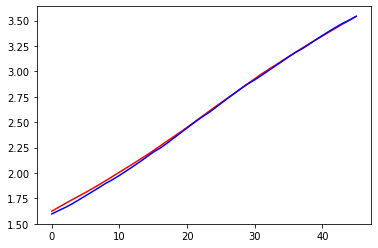

In [38]:
test_x,test_y = create(test)
pred = model_lstm.predict(test_x)
plt.plot(pred,color='r')
plt.plot(test_y,color='b')
plt.show()

In [39]:
X = np.array(df["Total Confirmed"])
X = scaler.transform(X.reshape(-1,1))
X,y = create(X)
pred_final = model_lstm.predict(X)

In [41]:
y = np.array([int(i) for i in scaler.inverse_transform(pred_final)])

In [42]:
s = "Pred Total Confirmed"
df[s] = np.nan

In [43]:
df[s][-len(y):] = y.reshape(-1)

In [44]:
df

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Pred Total Confirmed
Date,,,,,,,
2020-01-30,1,1,0,0,0,0,NaN
2020-01-31,0,1,0,0,0,0,NaN
2020-02-01,0,1,0,0,0,0,NaN
2020-02-02,1,2,0,0,0,0,NaN
2020-02-03,1,3,0,0,0,0,NaN
...,...,...,...,...,...,...,...
2020-10-02,79883,6471943,76339,5425063,1068,100289,6458272.0
2020-10-03,75479,6547422,81655,5506718,937,101226,6533151.0
2020-10-04,74770,6622192,76713,5583431,903,102129,6607162.0


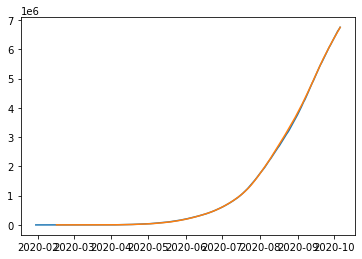

In [45]:
plt.plot(df["Total Confirmed"])
plt.plot(df[s])

In [46]:
for i in range(75):
    q = np.array([scaler.transform(np.array(df[s][-window:]).reshape(-1,1))])
    q = int(scaler.inverse_transform(model_lstm.predict(q)).reshape(-1))
    new_row = pd.DataFrame([q],columns=[s],index=[df.index[-1]+pd.Timedelta(days=1)])
    df = pd.concat([df,new_row])

<AxesSubplot:>

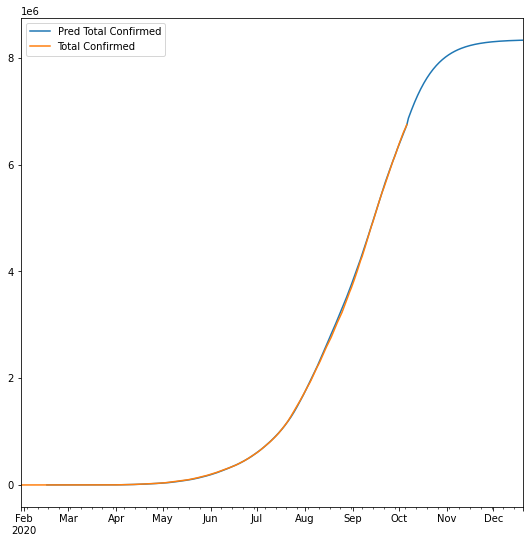

In [47]:
df[[s,"Total Confirmed"]].plot(figsize=(9,9))

In [48]:
df[[s,"Total Confirmed"]].to_csv("India_total_cases.csv")